In [109]:
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
import matplotlib.pylab as plt
from skimage import metrics
import cv2
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
import math


In [110]:
FS=0.00366772681*100
# FUNCTION_SDVIG_FAZY=math.pi/2
FUNCTION_SDVIG_FAZY=0

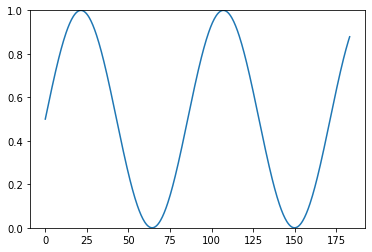

In [111]:

def a(x, chastota): # функция синуса
    return(0.5*np.sin(x*chastota+FUNCTION_SDVIG_FAZY)+0.5)

def b(chastota): # функция дискретизации
    sas=np.array([])
    for i in np.arange(0,FS*500,FS):
        sas=np.append(sas,a(i, chastota))
        # print(i)
    return sas

def draw(chastota):# вывод графика функции
    x=np.arange(0,FS*500,FS)
    plt.plot(x,a(x, chastota))
    # plt.xlim(0,300)
    plt.ylim(0,1)
    plt.show()

draw(FS/5)

In [112]:
width = 35.8
resolution = 6000
delta = (width/ resolution)


In [113]:

print(b(FS/5))

def image(p):
    p = p * 255
    image = np.full((len(p), len(p)), fill_value=p)
    plt.imshow(image, cmap="gray")
    return image



[5.00000000e-01 5.13450597e-01 5.26891459e-01 5.40312856e-01
 5.53705075e-01 5.67058421e-01 5.80363231e-01 5.93609873e-01
 6.06788760e-01 6.19890352e-01 6.32905167e-01 6.45823785e-01
 6.58636855e-01 6.71335103e-01 6.83909337e-01 6.96350457e-01
 7.08649457e-01 7.20797436e-01 7.32785600e-01 7.44605273e-01
 7.56247900e-01 7.67705052e-01 7.78968439e-01 7.90029907e-01
 8.00881449e-01 8.11515212e-01 8.21923499e-01 8.32098776e-01
 8.42033678e-01 8.51721014e-01 8.61153772e-01 8.70325126e-01
 8.79228436e-01 8.87857259e-01 8.96205349e-01 9.04266663e-01
 9.12035367e-01 9.19505838e-01 9.26672668e-01 9.33530670e-01
 9.40074880e-01 9.46300562e-01 9.52203210e-01 9.57778550e-01
 9.63022547e-01 9.67931407e-01 9.72501575e-01 9.76729745e-01
 9.80612854e-01 9.84148094e-01 9.87332905e-01 9.90164981e-01
 9.92642274e-01 9.94762990e-01 9.96525593e-01 9.97928809e-01
 9.98971621e-01 9.99653275e-01 9.99973277e-01 9.99931397e-01
 9.99527663e-01 9.98762368e-01 9.97636067e-01 9.96149574e-01
 9.94303965e-01 9.921005

In [114]:
low=0
up=1
level=128

In [115]:
def quant(b, low, upper, level): # квантование
    shrek = []
    levels = []
    while low <= upper:
        levels.append(low)
        low += 1/level

    print(levels)
    for i in b:
       for j in range(len(levels)):
           if i < levels[j]: 
                if i < (levels[j-1] + levels[j]) / 2:
                    shrek.append(levels[j-1])
                    break
                else:
                    shrek.append(levels[j])
                    break
    return np.array(shrek)

def irr_quant(b, low, upper, levels): # неравномерное квантование
    A = []
    print(levels)
    for i in b:
       for j in range(len(levels)):
           if i < levels[j]: 
                if i < (levels[j-1] + levels[j]) / 2:
                    A.append(levels[j-1])
                    break
                else:
                    A.append(levels[j])
                    break
    return np.array(A)


[0, 0.0078125, 0.015625, 0.0234375, 0.03125, 0.0390625, 0.046875, 0.0546875, 0.0625, 0.0703125, 0.078125, 0.0859375, 0.09375, 0.1015625, 0.109375, 0.1171875, 0.125, 0.1328125, 0.140625, 0.1484375, 0.15625, 0.1640625, 0.171875, 0.1796875, 0.1875, 0.1953125, 0.203125, 0.2109375, 0.21875, 0.2265625, 0.234375, 0.2421875, 0.25, 0.2578125, 0.265625, 0.2734375, 0.28125, 0.2890625, 0.296875, 0.3046875, 0.3125, 0.3203125, 0.328125, 0.3359375, 0.34375, 0.3515625, 0.359375, 0.3671875, 0.375, 0.3828125, 0.390625, 0.3984375, 0.40625, 0.4140625, 0.421875, 0.4296875, 0.4375, 0.4453125, 0.453125, 0.4609375, 0.46875, 0.4765625, 0.484375, 0.4921875, 0.5, 0.5078125, 0.515625, 0.5234375, 0.53125, 0.5390625, 0.546875, 0.5546875, 0.5625, 0.5703125, 0.578125, 0.5859375, 0.59375, 0.6015625, 0.609375, 0.6171875, 0.625, 0.6328125, 0.640625, 0.6484375, 0.65625, 0.6640625, 0.671875, 0.6796875, 0.6875, 0.6953125, 0.703125, 0.7109375, 0.71875, 0.7265625, 0.734375, 0.7421875, 0.75, 0.7578125, 0.765625, 0.7734375, 0.

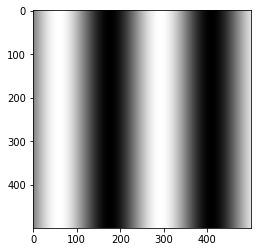

In [116]:
N = quant(b(FS/5), low, up, level)
picQ = image(N)   
print (picQ.shape) 

pic = image(b(FS/5))
pic = np.resize(pic, picQ.shape)

MSE = round(mse(pic,picQ) /255, 4)

print (MSE)

PSNR = round(psnr(pic,picQ, data_range=255), 4)
print(PSNR)

SSIM = round((ssim(pic,picQ, data_range=255)), 4)
print(SSIM)


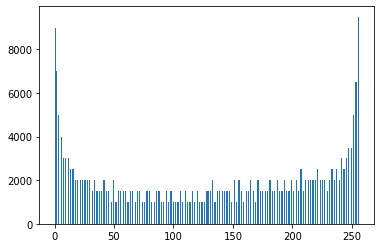

In [117]:
#Гистограмма
plt.hist(picQ.ravel(), 255, [0,256])
plt.show()

[0, 0.00390625, 0.0078125, 0.01171875, 0.015625, 0.01953125, 0.0234375, 0.02734375, 0.03125, 0.03515625, 0.0390625, 0.04296875, 0.046875, 0.05078125, 0.0546875, 0.05859375, 0.0625, 0.06640625, 0.0703125, 0.07421875, 0.078125, 0.08203125, 0.0859375, 0.08984375, 0.09375, 0.09765625, 0.1015625, 0.10546875, 0.109375, 0.11328125, 0.1171875, 0.12109375, 0.125, 0.12890625, 0.1328125, 0.13671875, 0.140625, 0.14453125, 0.1484375, 0.15234375, 0.15625, 0.16015625, 0.1640625, 0.16796875, 0.171875, 0.17578125, 0.1796875, 0.18359375, 0.1875, 0.19140625, 0.1953125, 0.19921875, 0.203125, 0.20703125, 0.2109375, 0.21484375, 0.21875, 0.22265625, 0.2265625, 0.23046875, 0.234375, 0.23828125, 0.2421875, 0.24609375, 0.25, 0.25390625, 0.2578125, 0.26171875, 0.265625, 0.26953125, 0.2734375, 0.27734375, 0.28125, 0.28515625, 0.2890625, 0.29296875, 0.296875, 0.30078125, 0.3046875, 0.30859375, 0.3125, 0.31640625, 0.3203125, 0.32421875, 0.328125, 0.33203125, 0.3359375, 0.33984375, 0.34375, 0.34765625, 0.3515625, 0.

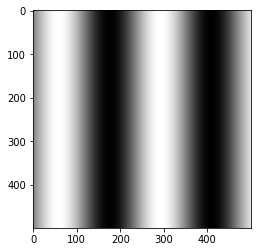

In [119]:
levels = [0, 0.00390625, 0.0078125, 0.01171875, 0.015625, 0.01953125, 0.0234375, 0.02734375, 0.03125, 0.03515625, 0.0390625, 0.04296875, 0.046875, 0.05078125, 0.0546875, 0.05859375, 0.0625, 0.06640625, 0.0703125, 0.07421875, 0.078125, 0.08203125, 0.0859375, 0.08984375, 0.09375, 0.09765625, 0.1015625, 0.10546875, 0.109375, 0.11328125, 0.1171875, 0.12109375, 0.125, 0.12890625, 0.1328125, 0.13671875, 0.140625, 0.14453125, 0.1484375, 0.15234375, 0.15625, 0.16015625, 0.1640625, 0.16796875, 0.171875, 0.17578125, 0.1796875, 0.18359375, 0.1875, 0.19140625, 0.1953125, 0.19921875, 0.203125, 0.20703125, 0.2109375, 0.21484375, 0.21875, 0.22265625, 0.2265625, 0.23046875, 0.234375, 0.23828125, 0.2421875, 0.24609375, 0.25, 0.25390625, 0.2578125, 0.26171875, 0.265625, 0.26953125, 0.2734375, 0.27734375, 0.28125, 0.28515625, 0.2890625, 0.29296875, 0.296875, 0.30078125, 0.3046875, 0.30859375, 0.3125, 0.31640625, 0.3203125, 0.32421875, 0.328125, 0.33203125, 0.3359375, 0.33984375, 0.34375, 0.34765625, 0.3515625, 0.35546875, 0.359375, 0.36328125, 0.3671875, 0.37109375, 0.375, 0.37890625, 0.3828125, 0.38671875, 0.390625, 0.39453125, 0.3984375, 0.40234375, 0.40625, 0.41015625, 0.4140625, 0.41796875, 0.421875, 0.42578125, 0.4296875, 0.43359375, 0.4375, 0.44140625, 0.4453125, 0.44921875, 0.453125, 0.45703125, 0.4609375, 0.46484375, 0.46875, 0.47265625, 0.4765625, 0.48046875, 0.484375, 0.48828125, 0.4921875, 0.49609375, 0.5, 0.50390625, 0.5078125, 0.51171875, 0.515625, 0.51953125, 0.5234375, 0.52734375, 0.53125, 0.53515625, 0.5390625, 0.54296875, 0.546875, 0.55078125, 0.5546875, 0.55859375, 0.5625, 0.56640625, 0.5703125, 0.57421875, 0.578125, 0.58203125, 0.5859375, 0.58984375, 0.59375, 0.59765625, 0.6015625, 0.60546875, 0.609375, 0.61328125, 0.6171875, 0.62109375, 0.625, 0.62890625, 0.6328125, 0.63671875, 0.640625, 0.64453125, 0.6484375, 0.65234375, 0.65625, 0.66015625, 0.6640625, 0.66796875, 0.671875, 0.67578125, 0.6796875, 0.68359375, 0.6875, 0.69140625, 0.6953125, 0.69921875, 0.703125, 0.70703125, 0.7109375, 0.71484375, 0.71875, 0.72265625, 0.7265625, 0.73046875, 0.734375, 0.73828125, 0.7421875, 0.74609375, 0.75, 0.75390625, 0.7578125, 0.76171875, 0.765625, 0.76953125, 0.7734375, 0.77734375, 0.78125, 0.78515625, 0.7890625, 0.79296875, 0.796875, 0.80078125, 0.8046875, 0.80859375, 0.8125, 0.81640625, 0.8203125, 0.82421875, 0.828125, 0.83203125, 0.8359375, 0.83984375, 0.84375, 0.84765625, 0.8515625, 0.85546875, 0.859375, 0.86328125, 0.8671875, 0.87109375, 0.875, 0.87890625, 0.8828125, 0.88671875, 0.890625, 0.89453125, 0.8984375, 0.90234375, 0.90625, 0.91015625, 0.9140625, 0.91796875, 0.921875, 0.92578125, 0.9296875, 0.93359375, 0.9375, 0.94140625, 0.9453125, 0.94921875, 0.953125, 0.95703125, 0.9609375, 0.96484375, 0.96875, 0.97265625, 0.9765625, 0.98046875, 0.984375, 0.98828125, 0.9921875, 0.99609375, 1.0]

N = irr_quant(b(FS/5), low, up, levels)
picIQ = image(N)   


MSE1 = round(mse(pic, picIQ) /255, 4)

print (MSE1)

PSNR1 = round(psnr(pic, picIQ, data_range=255), 2)
print(PSNR1)

SSIM1 = round((ssim(pic, picIQ, data_range=255)), 4)
print(SSIM1)
